MLP Raw - MSE: 255.7421, R²: 0.9683


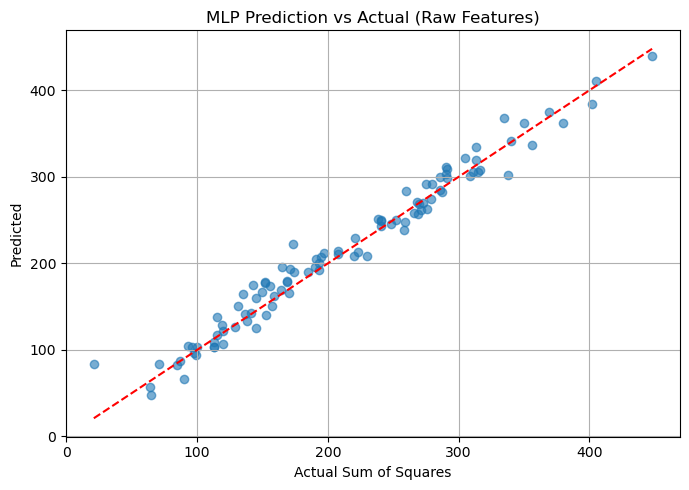

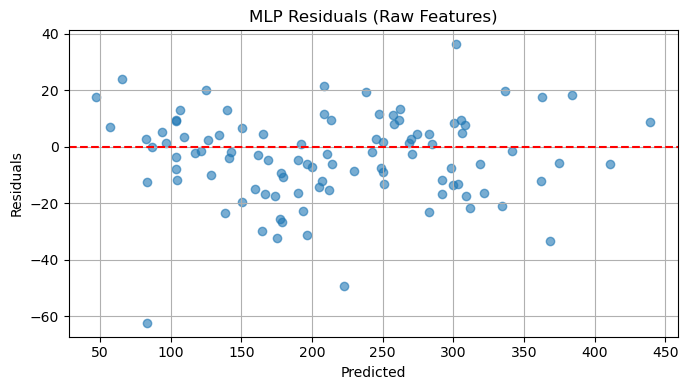

In [5]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

train_df = pd.read_csv('train_3x3_eigen_data.csv')
test_df = pd.read_csv('test_3x3_eigen_data.csv')

X_train = train_df[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']]
X_test = test_df[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']]
y_train = train_df['sum_squared']
y_test = test_df['sum_squared']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=2000, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

print(f"MLP Raw - MSE: {mean_squared_error(y_test, y_pred):.4f}, R²: {r2_score(y_test, y_pred):.4f}")

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("MLP Prediction vs Actual (Raw Features)")
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(7, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("MLP Residuals (Raw Features)")
plt.grid(True)
plt.tight_layout()
plt.show()


MLP Featured:
  MSE: 304.9172
  R²: 0.9622


c:\Users\itsay\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


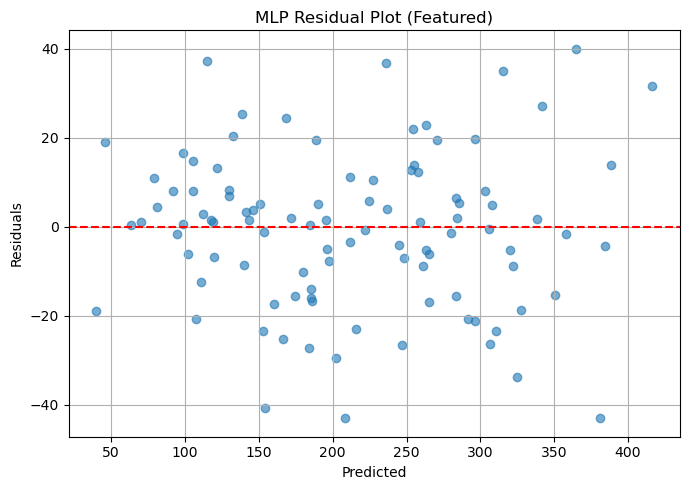

In [6]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def add_features(df):
    df = df.copy()
    df['trace'] = df['a'] + df['e'] + df['i']
    df['det'] = (
        df['a'] * (df['e'] * df['i'] - df['f'] * df['h']) -
        df['b'] * (df['d'] * df['i'] - df['f'] * df['g']) +
        df['c'] * (df['d'] * df['h'] - df['e'] * df['g'])
    )
    df['sym_score'] = (
        abs(df['a'] - df['a']) + abs(df['b'] - df['d']) + abs(df['c'] - df['g']) +
        abs(df['d'] - df['b']) + abs(df['e'] - df['e']) + abs(df['f'] - df['h']) +
        abs(df['g'] - df['c']) + abs(df['h'] - df['f']) + abs(df['i'] - df['i'])
    )
    return df

train_df = pd.read_csv("train_3x3_eigen_data.csv")
test_df = pd.read_csv("test_3x3_eigen_data.csv")

train_df = add_features(train_df)
test_df = add_features(test_df)

features = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'trace', 'det', 'sym_score']
X_train = train_df[features]
y_train = train_df['sum_squared']
X_test = test_df[features]
y_test = test_df['sum_squared']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MLP Featured:\n  MSE: {mse:.4f}\n  R²: {r2:.4f}")

residuals = y_test - y_pred
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("MLP Residual Plot (Featured)")
plt.grid(True)
plt.tight_layout()
plt.show()